In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
from tqdm import tqdm

# 1.2.b
## Rock Paper Scissors

In [ ]:
T = 100
eta = 1
eta_list = [0.01,0.05,0.1,0.5,1]
qt = np.array([1/3, 1/6, 0.5])
M = 3
N = 3
L = np.array([
    [0,1,-1],
    [-1,0,1],
    [1,-1,0]
])

def rand_weighted(p):
  cum_p = np.cumsum(p)
  proba = rd.rand()

  arm = np.searchsorted(cum_p, proba)
  return min(arm, len(p) - 1)

def EWA_update(eta, pt, lt):
    p_ = np.array([pt[i] * np.exp(-eta * lt[i]) for i in range(len(pt))])
    return p_ / p_.sum()

def RPS(T, eta, qt, L):
  loss_history = []
  average_loss = []
  pt = [0.3,0.3,0.4]
  pt_history = []
  for t in range(T):
    it = rand_weighted(pt)
    jt = rand_weighted(qt)

    pt = EWA_update(eta, pt, L[:, jt])

    loss_history.append(L[it][jt])
    average_loss.append(sum(loss_history[j] for j in range(len(loss_history)))/(t+1))

    pt_history.append(pt)
  return average_loss, pt_history


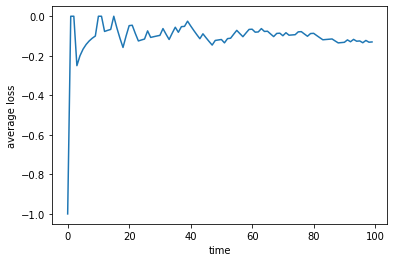

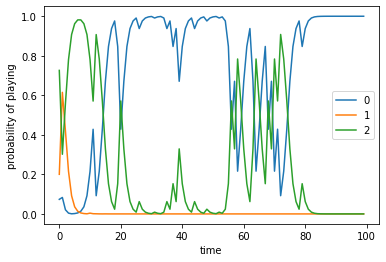

In [ ]:
average_loss, pt_history = RPS(T,eta,qt,L)

# 1.2.c
plt.plot(average_loss)
plt.xlabel('time')
plt.ylabel('average loss')

#1.2.b
plt.figure()
for i in range(len(pt_history[0])):
  plt.plot([row[i] for row in pt_history], label=i)
  plt.xlabel('time')
  plt.ylabel('probability of playing')
  plt.legend()
plt.show()

eta =  0.01


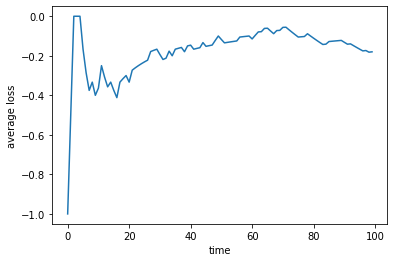

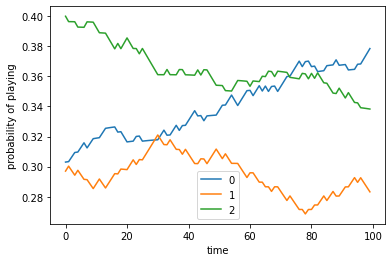

eta =  0.05


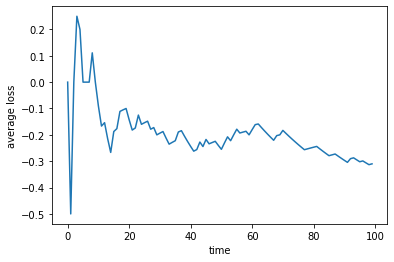

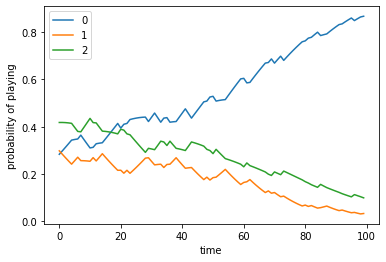

eta =  0.1


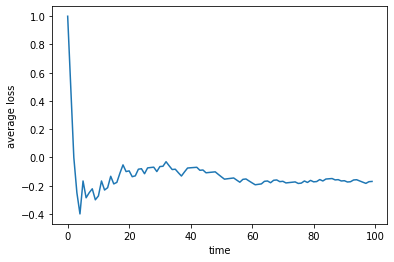

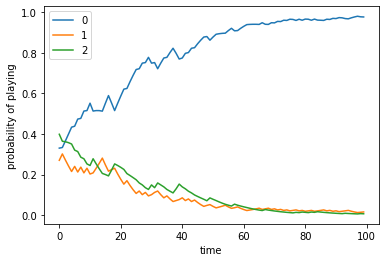

eta =  0.5


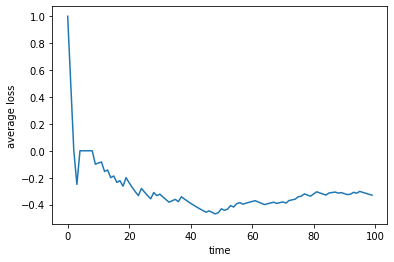

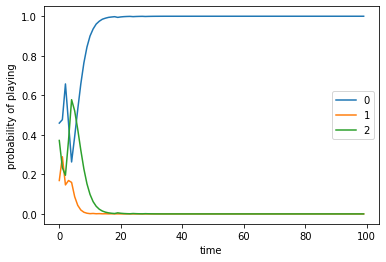

eta =  1


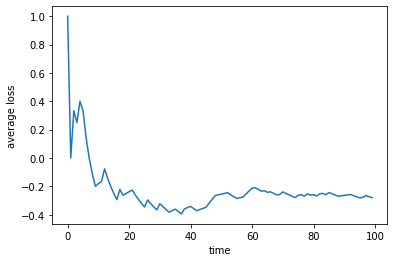

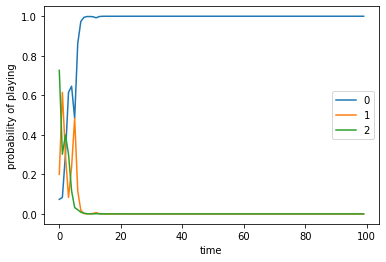

In [ ]:
# 1.2.d
for eta in eta_list:
  print("eta = ", eta)
  average_loss, pt_history = RPS(T,eta,qt,L)

  plt.plot(average_loss)
  plt.xlabel('time')
  plt.ylabel('average loss')

  plt.figure()
  for i in range(len(pt_history[0])):
    plt.plot([row[i] for row in pt_history], label=i)
    plt.xlabel('time')
    plt.ylabel('probability of playing')
    plt.legend()
  plt.show()

In [ ]:
# 1.2.c

In [ ]:
# 1.2.d

In [ ]:
# 1.3.a

def OGD_update(qt,gt,eta):
    qt = np.array(qt)
    gt = np.array(gt)

    q_ = qt - eta * gt
    q_sorted = -np.sort(-q_)

    rho = max([
        j for j in range(len(q_sorted))
        if q_sorted[j] + (1 - q_sorted[:j + 1].sum()) / (j + 1) > 0
    ])
    lambda_ = (1 - q_sorted[:rho + 1].sum()) / (rho + 1)

    return np.maximum(q_ + lambda_, 0)

def OGD(T, eta, qt, L):
  loss_history = []
  average_loss = []

  pt = [0.3,0.3,0.4]
  pt_history = []
  qt_history = []
  for t in range(T):
    it = rand_weighted(pt)
    jt = rand_weighted(qt)

    qt = OGD_update(qt, -L[it, :], eta) # new
    pt = EWA_update(eta, pt, L[:, jt])

    loss_history.append(L[it][jt])
    average_loss.append(
        loss_history[t] if t == 0 else (average_loss[t - 1] * t + loss_history[t]) / (t + 1)
    )
    # average_loss.append(
    #     sum(
    #         loss_history[j] for j in range(len(loss_history))
    #     ) / (t + 1)
    # )

    qt_history.append(qt)
    pt_history.append(pt)
  return average_loss, pt_history, qt_history

In [ ]:
# 1.3.b
eta = 0.05
average_loss, pt_history, qt_history = OGD(T,eta,qt,L)

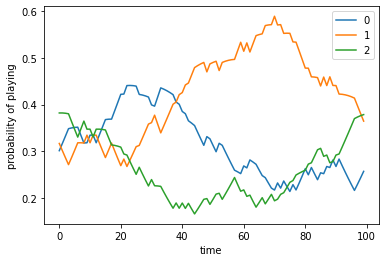

In [ ]:
plt.figure()
for i in range(len(pt_history[0])):
  plt.plot([row[i] for row in pt_history], label=i)
  plt.legend()
  plt.xlabel('time')
  plt.ylabel('probability of playing')
plt.show()

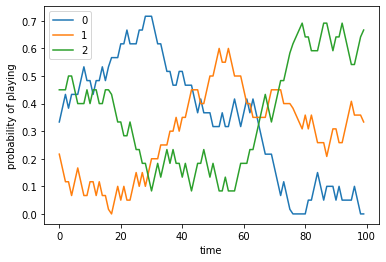

In [ ]:
plt.figure()
for i in range(len(qt_history[0])):
  plt.plot([row[i] for row in qt_history], label=i)
  plt.legend()
  plt.xlabel('time')
  plt.ylabel('probability of playing')
plt.show()

Text(0, 0.5, 'average loss')

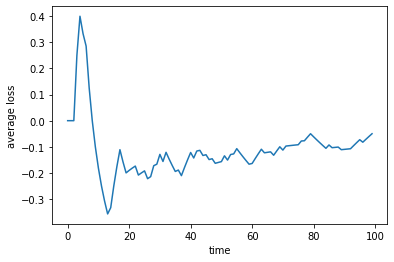

In [ ]:
# 1.3.c

plt.plot(average_loss)
plt.xlabel('time')
plt.ylabel('average loss')

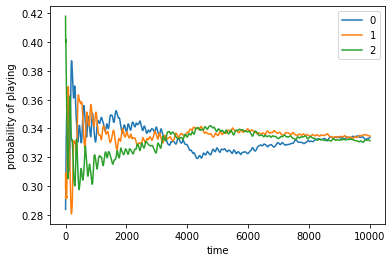

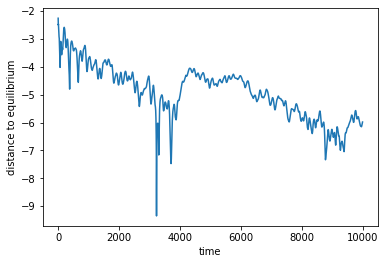

In [ ]:
# 1.3.d
eta = 0.05
T = 10000
average_loss, pt_history, qt_history = OGD(T,eta,qt,L)

pt_average = np.cumsum(pt_history, axis=0) / np.linspace(1, T+1, num=T)[:, None]
dist_to_nash = np.log(np.linalg.norm(pt_average - np.ones(3) / 3, axis=1))

plt.figure()
for i in range(len(pt_history[0])):
  plt.plot([row[i] for row in pt_average], label=i)
  plt.legend()
  plt.xlabel('time')
  plt.ylabel('probability of playing')
plt.show()

plt.figure()
plt.plot(dist_to_nash)
plt.xlabel('time')
plt.ylabel('distance to equilibrium')
plt.show()


In [ ]:
# 1.4

def EXP3_update(eta, pt, cum_approx_loss):
    p_ = np.array([np.exp(-eta * cum_approx_loss[i]) for i in range(len(pt))])
    return p_ / p_.sum()

def EXP3(T, eta, qt, L):
  loss_history = []
  average_loss = []

  pt = [0.3,0.3,0.4]
  pt_history = []

  cum_approx_loss = np.zeros(len(pt))

  for t in range(T):
    it = rand_weighted(pt)
    jt = rand_weighted(qt)

    lt = L[it][jt]
    cum_approx_loss[it] += lt / pt[it]

    pt = EXP3_update(eta, pt, cum_approx_loss)

    loss_history.append(lt)
    average_loss.append(sum(loss_history[j] for j in range(len(loss_history)))/(t+1))

    pt_history.append(pt)
  return average_loss, pt_history

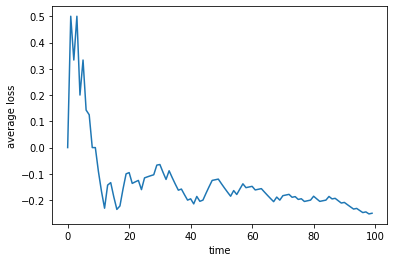

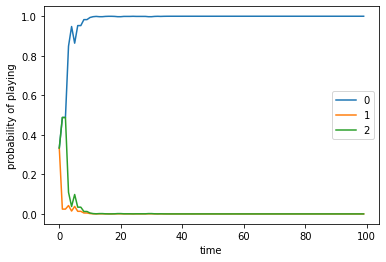

In [ ]:
# 1.5
T = 100
eta = 1
qt = np.array([1/3, 1/6, 0.5])

average_loss, pt_history = EXP3(T, eta, qt, L)

# 1.5.c
plt.plot(average_loss)
plt.xlabel('time')
plt.ylabel('average loss')

#1.5.b
plt.figure()
for i in range(len(pt_history[0])):
  plt.plot([row[i] for row in pt_history], label=i)
  plt.xlabel('time')
  plt.ylabel('probability of playing')
  plt.legend()
plt.show()


eta =  0.01


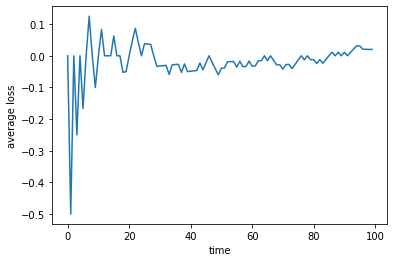

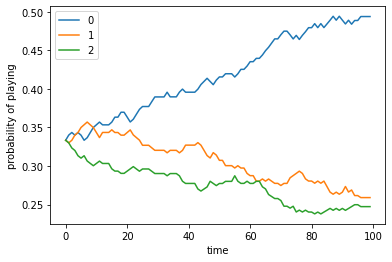

eta =  0.05


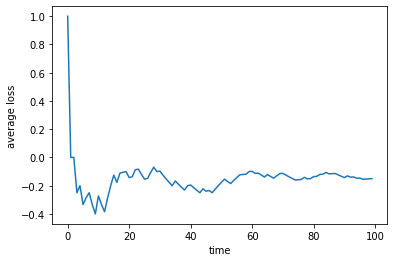

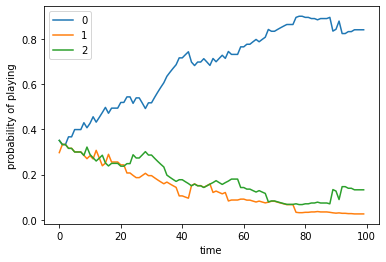

eta =  0.1


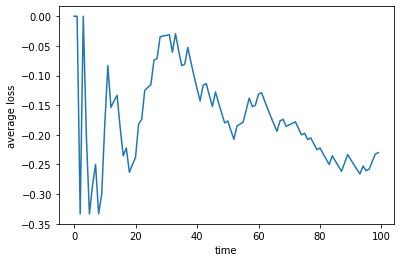

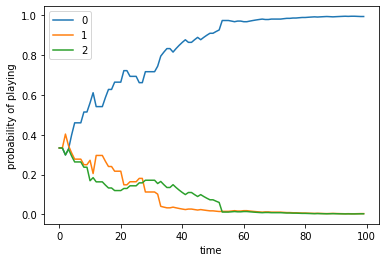

eta =  0.5


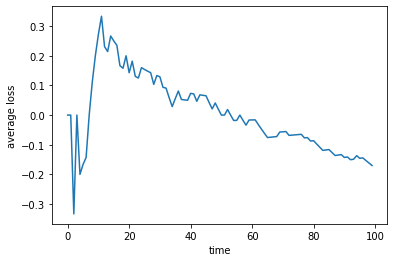

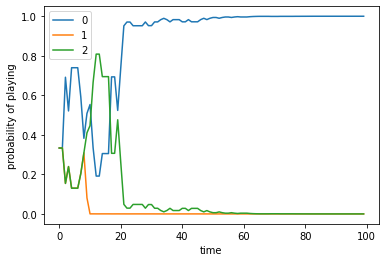

eta =  1


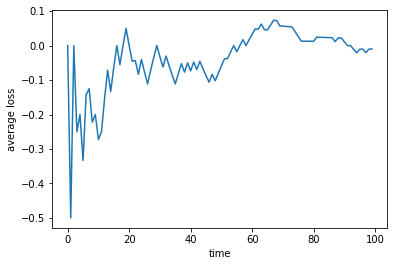

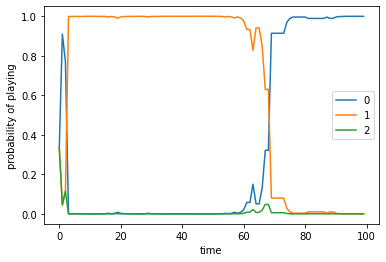

In [ ]:
# 1.5.d
for eta in eta_list:
  print("eta = ", eta)
  average_loss, pt_history = EXP3(T,eta,qt,L)

  plt.plot(average_loss)
  plt.xlabel('time')
  plt.ylabel('average loss')

  plt.figure()
  for i in range(len(pt_history[0])):
    plt.plot([row[i] for row in pt_history], label=i)
    plt.xlabel('time')
    plt.ylabel('probability of playing')
    plt.legend()
  plt.show()

# 2.1.b
## FTL

In [ ]:
# constants
K = 2
p = np.array([0.5,0.6])
T = 100
repetitions = 1000

In [ ]:
def FTL(K = K, p = p, T = T):
  probas_estim = np.zeros(K)
  arm_counter = np.zeros(K)

  regret = T * p.max()

  for i in range(T):
    draws = probas_estim[:]
    rd.shuffle(draws)  # so it does not always choose first arm when probas_estim = 0

    decision = np.argmax(draws)
    environment = rd.binomial(1, p)

    outcome = environment[decision]
    regret -= p[decision]

    arm_counter[decision] += 1
    probas_estim[decision] = (probas_estim[decision] * (arm_counter[decision] - 1) + outcome) / arm_counter[decision]

  return regret

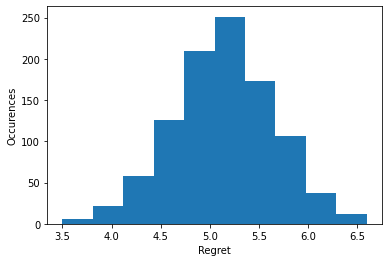

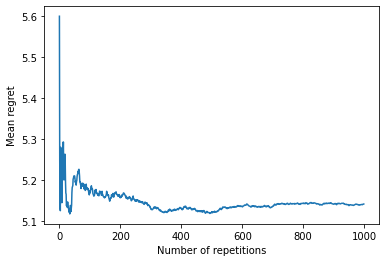

In [ ]:
histo = []
mean_regret_history = []
for i in range(repetitions):
  regret = FTL(K, p, T)

  histo.append(regret)
  mean_regret_history.append(
    regret if i == 0 else (mean_regret_history[i - 1] * i + regret) / (i + 1)
  )

plt.figure()
plt.hist(histo)
plt.xlabel("Regret")
plt.ylabel("Occurences")
plt.show()

plt.figure()
plt.plot(mean_regret_history)
plt.xlabel("Number of repetitions")
plt.ylabel("Mean regret")
plt.show()

# 2.2.f
## UCB Algorithm

In [ ]:
def UCB(K = K, p = p, T = T, sigma2 = 1 / 4):
  probas_estim = np.zeros(K)
  arm_counter = np.zeros(K)

  regret = T * p.max()

  for t in range(T):
    if t < K:
        decision = t
    else:
        decision = np.argmax(
            probas_estim + np.sqrt(2 * sigma2 * np.log(t + 1) / arm_counter)
        )
    environment = rd.binomial(1, p)

    outcome = environment[decision]
    regret -= p[decision]

    arm_counter[decision] += 1
    probas_estim[decision] = (probas_estim[decision] * (arm_counter[decision] - 1) + outcome) / arm_counter[decision]

  return regret

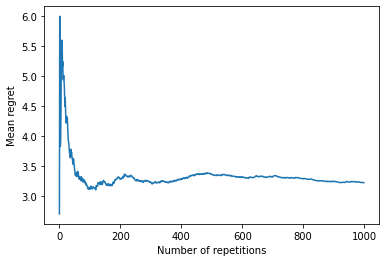

In [ ]:
mean_regret_history = []
for i in range(repetitions):
  regret = UCB(K, p, T)

  mean_regret_history.append(
    regret if i == 0 else (mean_regret_history[i - 1] * i + regret) / (i + 1)
  )

plt.figure()
plt.plot(mean_regret_history)
plt.xlabel("Number of repetitions")
plt.ylabel("Mean regret")
plt.show()

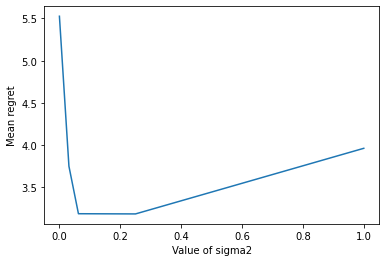

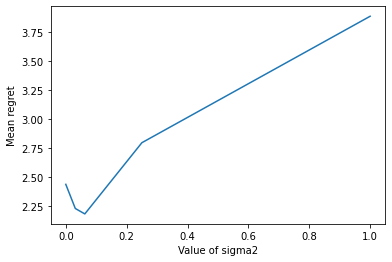

In [ ]:
Sigma2 = [0, 1/32, 1/16, 1/4, 1]
mean_regret_history = np.zeros(len(Sigma2))

for i in range(len(Sigma2)):

    mean_regret = 0
    for j in range(1000):
        sigma2 = Sigma2[i]
        regret = UCB(K, p, T, sigma2=sigma2)

        mean_regret += regret

    mean_regret_history[i] = mean_regret / 1000

plt.figure()
plt.plot(Sigma2, mean_regret_history)
plt.xlabel("Value of sigma2")
plt.ylabel("Mean regret")
plt.show()

# different p
Sigma2 = [0, 1/32, 1/16, 1/4, 1]
mean_regret_history = np.zeros(len(Sigma2))

for i in range(len(Sigma2)):

    mean_regret = 0
    for j in range(1000):
        sigma2 = Sigma2[i]
        regret = UCB(K, np.array([0.85, 0.95]), T, sigma2=sigma2)

        mean_regret += regret

    mean_regret_history[i] = mean_regret / 1000

plt.figure()
plt.plot(Sigma2, mean_regret_history)
plt.xlabel("Value of sigma2")
plt.ylabel("Mean regret")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


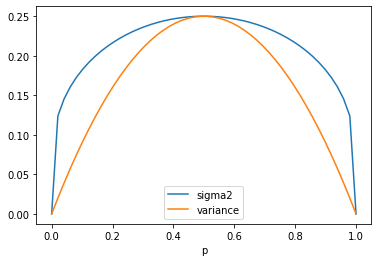

In [ ]:
P = np.linspace(0, 1)

Sigma2 = (P - (1 - P)) / (np.log(P) - np.log(1 - P)) / 2
var = P * (1 - P)

plt.figure()
plt.plot(P, Sigma2, label="sigma2")
plt.plot(P, var, label="variance")
plt.xlabel("p")
plt.legend()
plt.show()

# 2.5.c
## UCB-V Algorithm

In [ ]:
def UCB_V(K = K, p = p, T = T, b=1, xi=1.1, c=1):
  arm_counter = np.zeros(K)
  mean_estim = np.zeros(K)
  var_estim = np.zeros(K)

  regret = T * p.max()

  for t in range(T):
    if t < K:
        decision = t
    else:
        decision = np.argmax(
            mean_estim + np.sqrt(2 * var_estim * xi * np.log(t + 1) / arm_counter) + 3 * b * c * xi / arm_counter
        )
    environment = rd.binomial(1, p)

    outcome = environment[decision]
    regret -= p[decision]

    arm_counter[decision] += 1
    mean_estim_future = (mean_estim[decision] * (arm_counter[decision] - 1) + outcome) / arm_counter[decision]
    var_estim[decision] = (arm_counter[decision] - 1) * var_estim[decision] + (outcome - mean_estim[decision]) * (outcome - mean_estim_future)
    mean_estim[decision] = mean_estim_future

  return regret

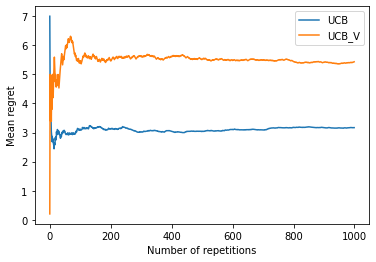

In [ ]:
mean_regret_history_UCB = []
mean_regret_history_UCB_V = []
for i in range(repetitions):
  regret_UCB = UCB(K, p, T)
  regret_UCB_V = UCB_V(K, p, T)

  mean_regret_history_UCB.append(
    regret_UCB if i == 0 else (mean_regret_history_UCB[i - 1] * i + regret_UCB) / (i + 1)
  )

  mean_regret_history_UCB_V.append(
    regret_UCB_V if i == 0 else (mean_regret_history_UCB_V[i - 1] * i + regret_UCB_V) / (i + 1)
  )

plt.figure()
plt.plot(mean_regret_history_UCB, label="UCB")
plt.plot(mean_regret_history_UCB_V, label="UCB_V")
plt.xlabel("Number of repetitions")
plt.ylabel("Mean regret")
plt.legend()
plt.show()

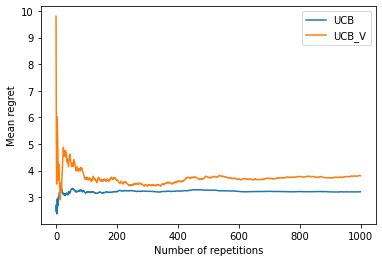

In [ ]:
p = np.array([0.1, 0.2])

mean_regret_history_UCB = []
mean_regret_history_UCB_V = []
for i in range(repetitions):
  regret_UCB = UCB(K, p, T)
  regret_UCB_V = UCB_V(K, p, T)

  mean_regret_history_UCB.append(
    regret_UCB if i == 0 else (mean_regret_history_UCB[i - 1] * i + regret_UCB) / (i + 1)
  )

  mean_regret_history_UCB_V.append(
    regret_UCB_V if i == 0 else (mean_regret_history_UCB_V[i - 1] * i + regret_UCB_V) / (i + 1)
  )

plt.figure()
plt.plot(mean_regret_history_UCB, label="UCB")
plt.plot(mean_regret_history_UCB_V, label="UCB_V")
plt.xlabel("Number of repetitions")
plt.ylabel("Mean regret")
plt.legend()
plt.show()

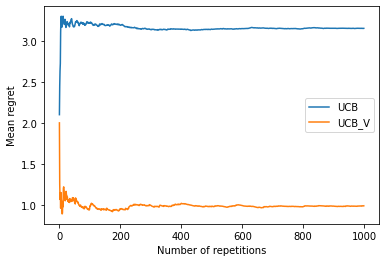

In [ ]:
p = np.array([0., 0.1])

mean_regret_history_UCB = []
mean_regret_history_UCB_V = []
for i in range(repetitions):
  regret_UCB = UCB(K, p, T)
  regret_UCB_V = UCB_V(K, p, T)

  mean_regret_history_UCB.append(
    regret_UCB if i == 0 else (mean_regret_history_UCB[i - 1] * i + regret_UCB) / (i + 1)
  )

  mean_regret_history_UCB_V.append(
    regret_UCB_V if i == 0 else (mean_regret_history_UCB_V[i - 1] * i + regret_UCB_V) / (i + 1)
  )

plt.figure()
plt.plot(mean_regret_history_UCB, label="UCB")
plt.plot(mean_regret_history_UCB_V, label="UCB_V")
plt.xlabel("Number of repetitions")
plt.ylabel("Mean regret")
plt.legend()
plt.show()